In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'results_modified.csv'
play_df = pd.read_csv(file_path, sep=',')
play_df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2012-13,2012-08-18T00:00:00Z,Arsenal,Sunderland,0,0,D,0,0,D,...,4,2,7,0,12,8,0,0,0,0
1,2012-13,2012-08-18T00:00:00Z,Fulham,Norwich,5,0,H,2,0,H,...,9,2,6,3,12,11,0,0,0,0
2,2012-13,2012-08-18T00:00:00Z,Newcastle,Tottenham,2,1,H,0,0,D,...,4,6,3,5,12,8,2,2,0,0
3,2012-13,2012-08-18T00:00:00Z,QPR,Swansea,0,5,A,0,1,A,...,11,8,5,3,11,14,2,2,0,0
4,2012-13,2012-08-18T00:00:00Z,Reading,Stoke,1,1,D,0,1,A,...,3,3,4,3,9,14,2,4,0,1


In [2]:
play_df.isnull().sum()

Season      0
DateTime    0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HC          0
AC          0
HF          0
AF          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [3]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['axes.grid'] = True 

def bar_chart(feature):
    survived = play_df[play_df['survived']==1][feature].value_counts()
    dead = play_df[play_df['survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['survived','dead']
    df.plot(kind='bar',stacked=True)

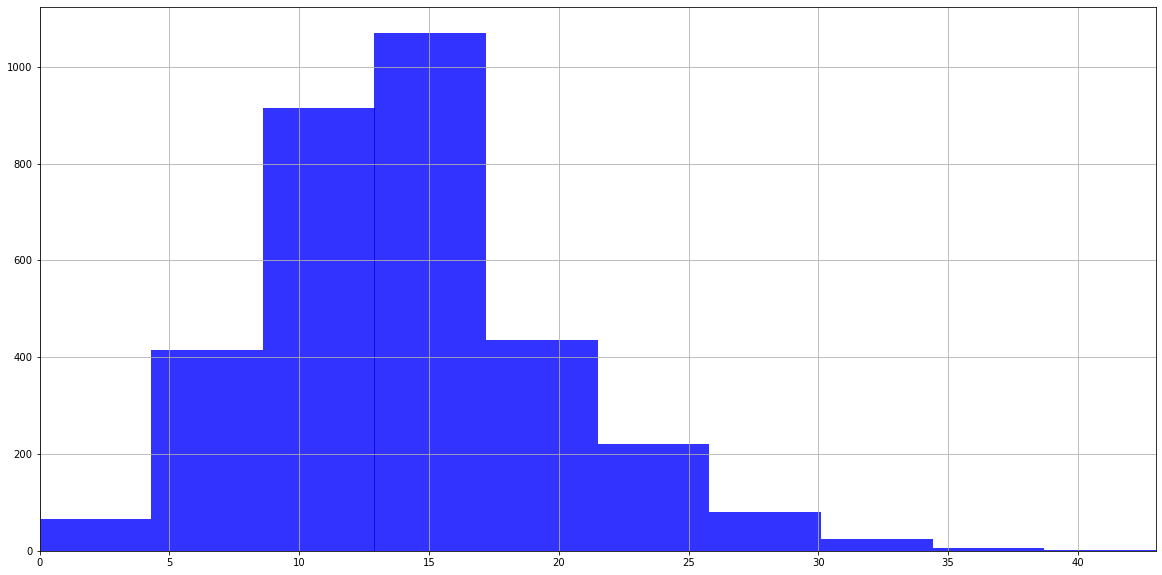

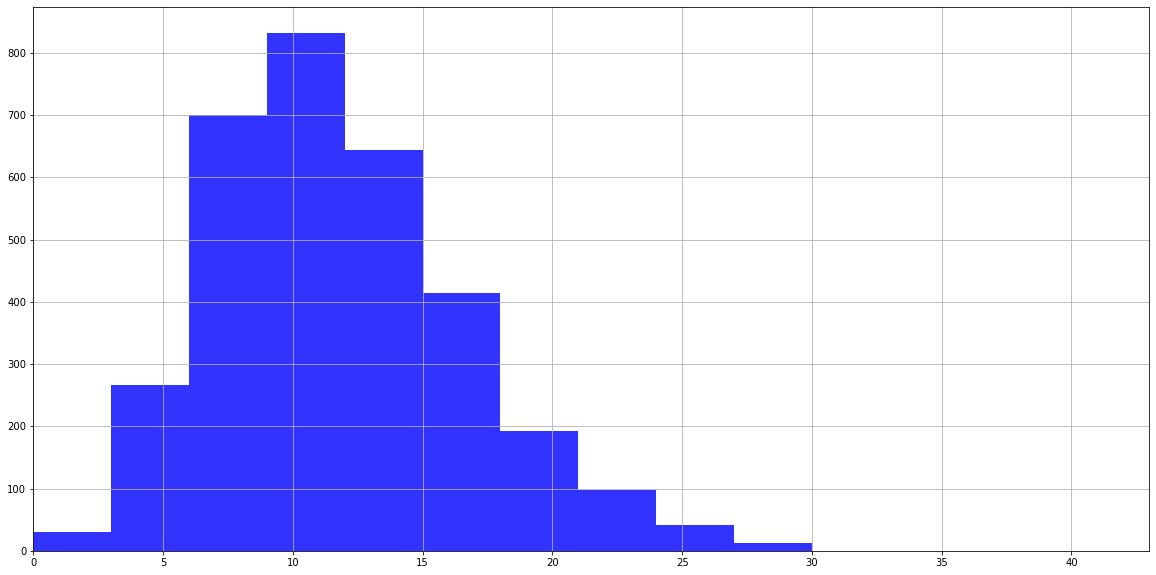

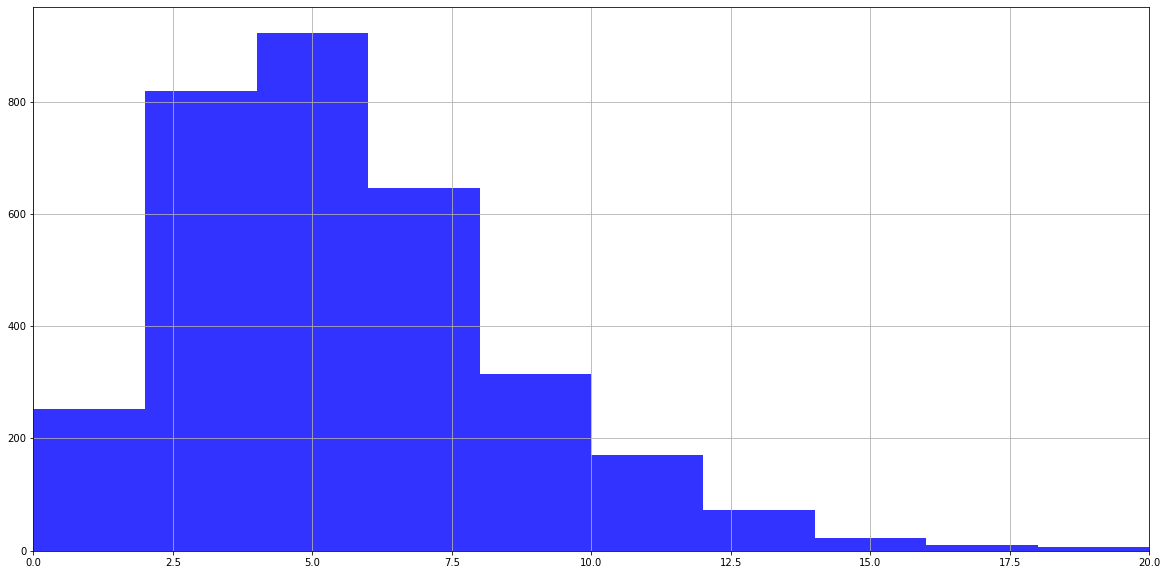

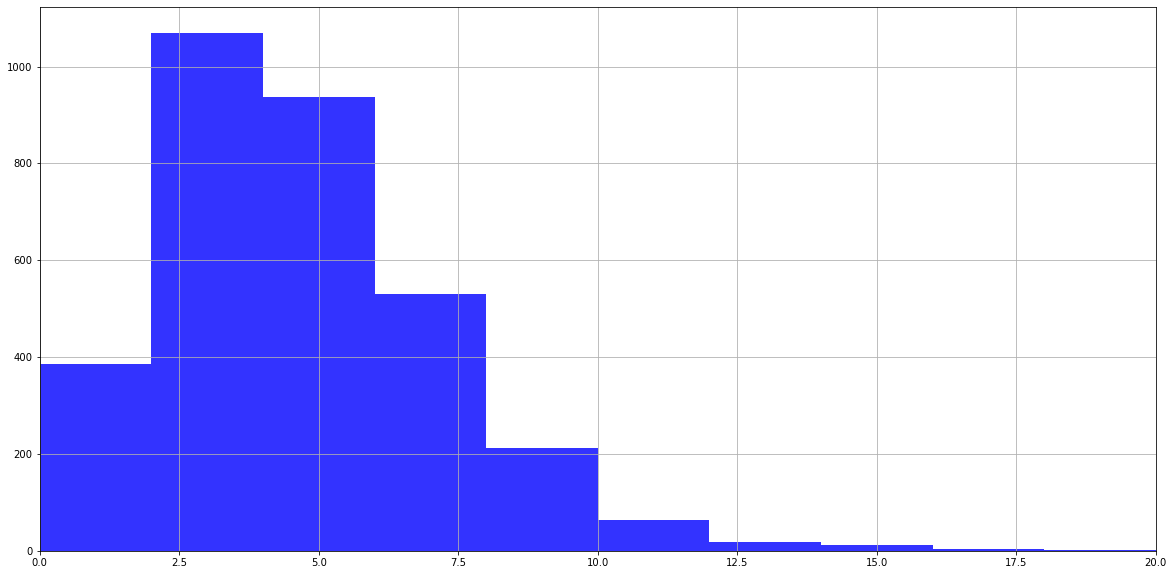

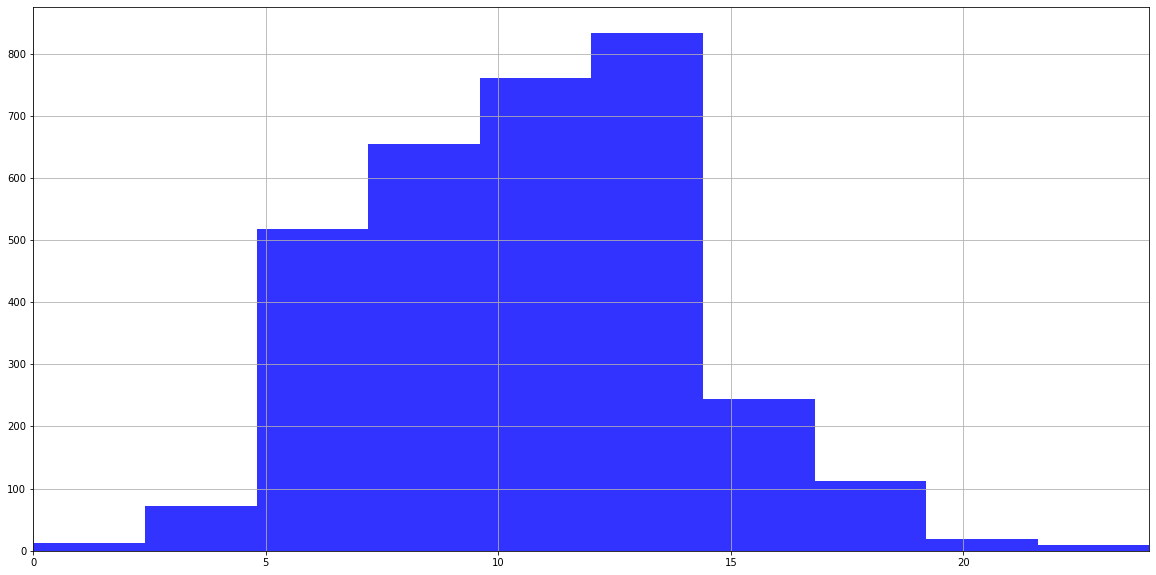

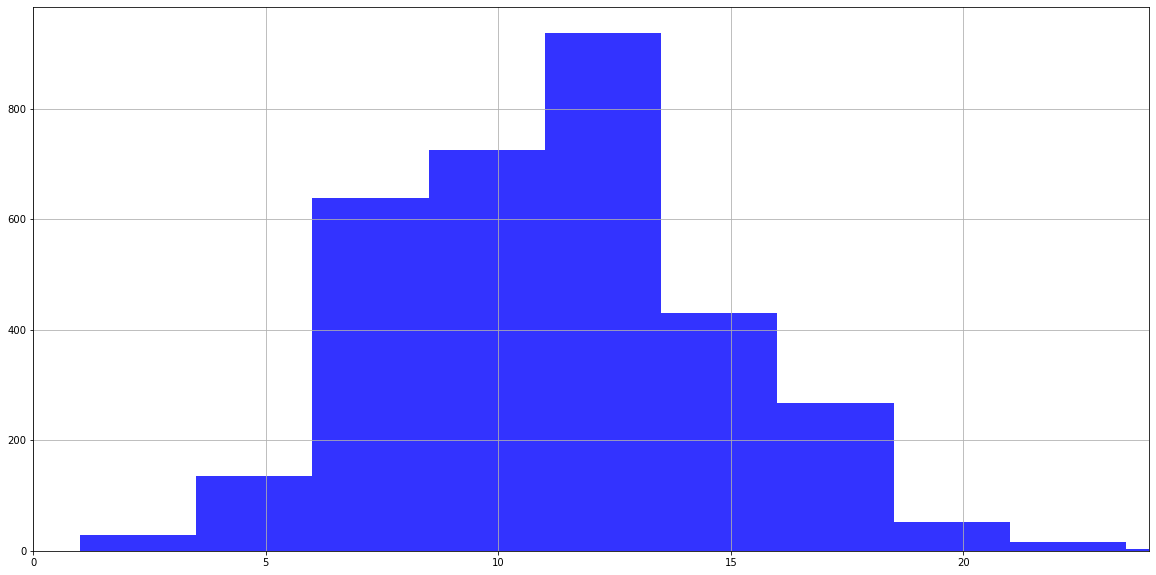

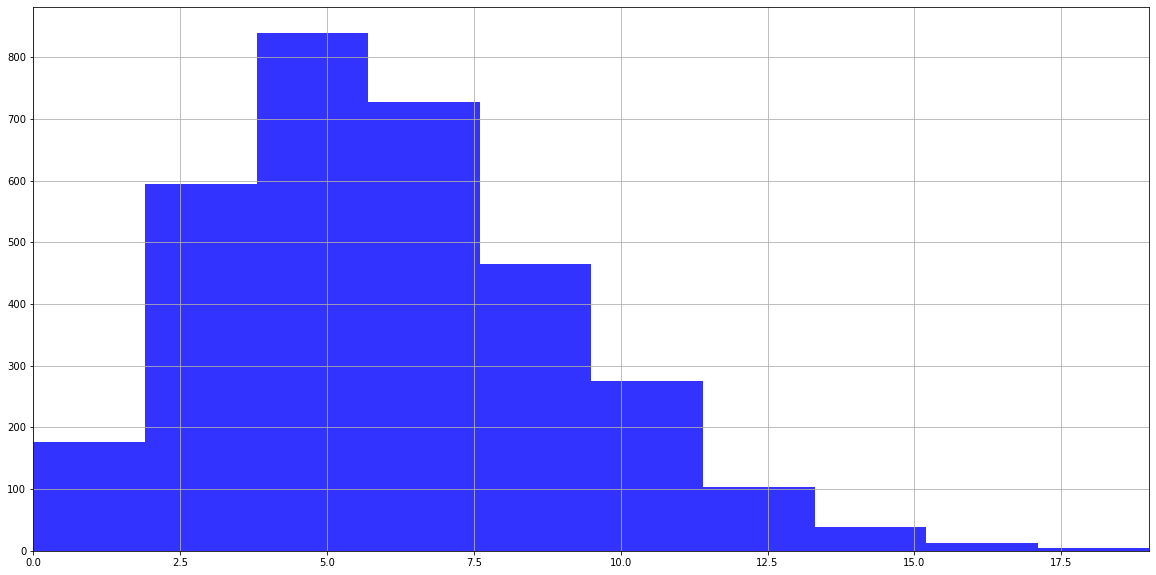

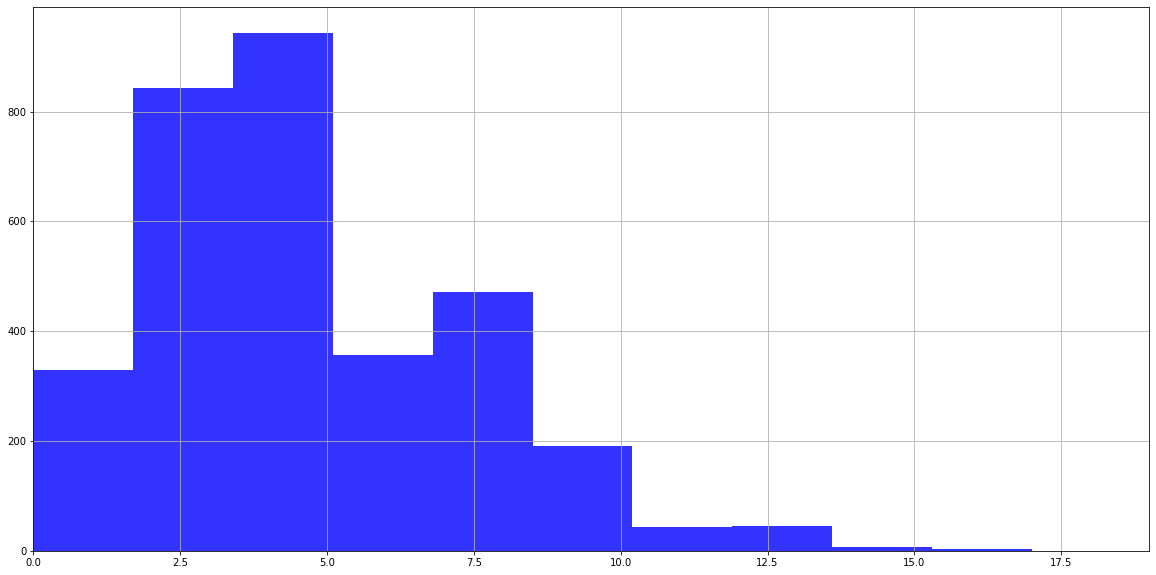

In [4]:
#히스토그램 확인
#슈팅기록, 유효슈팅기록,코너킥기록, 반칙기록, 
col=['HS','AS','HST','AST','HF','AF','HC','AC']
j=0
for i in col:
    if(j%2==0):
        lim=play_df[i].max()
    j= j+1
    ax=play_df[i].hist(bins=10,color='blue',alpha=0.8)
    plt.xlim([0,lim])
    plt.savefig(i+".png",dpi=400,bbox_inches='tight')
    plt.show()

In [5]:
#epl분석

import numpy  as np
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)                    # To display values only upto four decimal places. 

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To adjust seaborn settings for the plots.

import warnings
warnings.filterwarnings('ignore')       


<ipython-input-5-dae5118acc4b>:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)           # To display all the data in each column


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2012-13'),
  Text(1, 0, '2013-14'),
  Text(2, 0, '2014-15'),
  Text(3, 0, '2015-16'),
  Text(4, 0, '2016-17'),
  Text(5, 0, '2017-18'),
  Text(6, 0, '2018-19'),
  Text(7, 0, '2019-20'),
  Text(8, 0, '2020-21')])

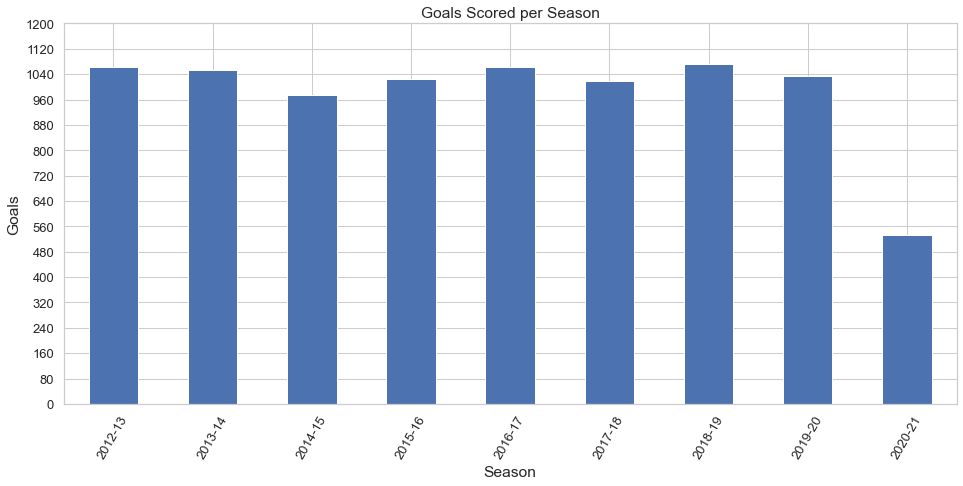

In [6]:
#시즌별 골
play_df['Total_Match_Goals'] = play_df['FTHG'] + play_df['FTAG']

play_df.groupby('Season')['Total_Match_Goals'].sum().plot(kind='bar',fontsize=13,figsize=(16,7),yticks=np.arange(0,1201,80)) 

plt.title("Goals Scored per Season")
plt.xlabel("Season")
plt.ylabel("Goals")
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2012-13'),
  Text(1, 0, '2013-14'),
  Text(2, 0, '2014-15'),
  Text(3, 0, '2015-16'),
  Text(4, 0, '2016-17'),
  Text(5, 0, '2017-18'),
  Text(6, 0, '2018-19'),
  Text(7, 0, '2019-20'),
  Text(8, 0, '2020-21')])

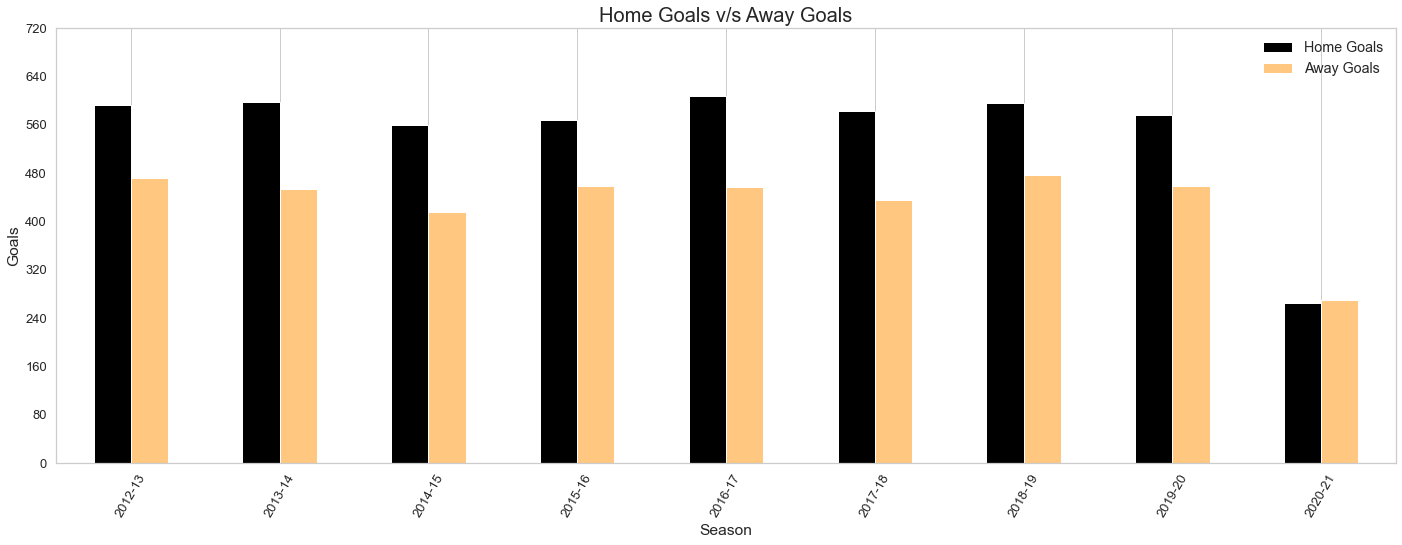

In [7]:
#시즌 별 홈팀 - 어웨이팀 골수 비교
play_df.groupby('Season')[['FTHG','FTAG']].sum().plot(kind='bar',fontsize=13,figsize=(24,8),yticks=np.arange(0,721,80),colormap='copper')
plt.grid(axis='y')
plt.ylabel('Goals')
plt.legend(['Home Goals','Away Goals'])
plt.title("Home Goals v/s Away Goals",fontsize=20)
plt.xticks(rotation=60)



In [8]:
#홈팀,어웨이팀으로 나누어져있는 feature를 하나로 만듬



play_df['DIFF_FG'] =play_df['FTHG'] - play_df['FTAG']
play_df['DIFF_HG'] = play_df['HTHG'] - play_df['HTAG']
play_df['DIFF_SHOOT'] = play_df['HS'] - play_df['AS']
play_df['DIFF_ST'] = play_df['HST'] - play_df['AST']
play_df['DIFF_FOUL'] = play_df['HF'] - play_df['AF']
play_df['DIFF_CONER'] = play_df['HC'] - play_df['AC']
play_df['DIFF_YC'] = play_df['HY'] - play_df['AY']
play_df['DIFF_RC'] = play_df['HR'] - play_df['AR']





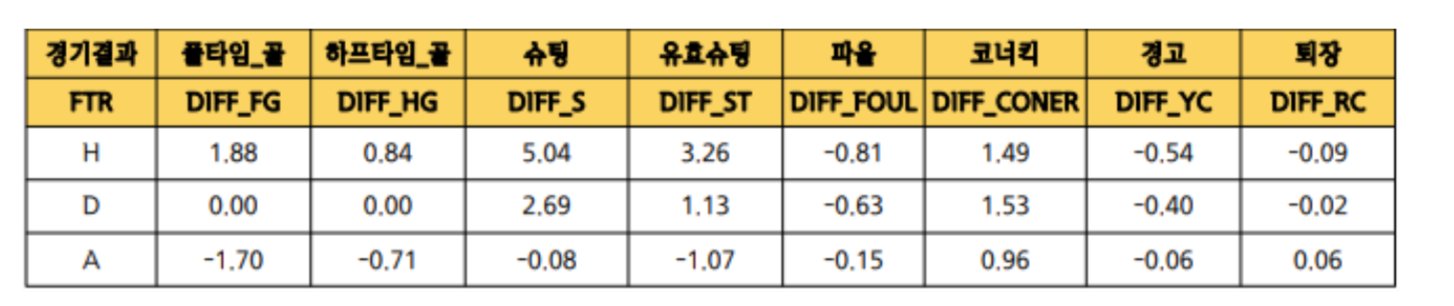




(홈 팀 관련 속성값 — 어웨이 팀 관련 속성값)이므로 양수 값이면 홈 팀이 그 항목에대해 우위이고, 음수 값이면 어웨이 팀이 우위이다.
홈 팀은 대체적으로 지배하는 경기를 펼치려 한다
어웨이 팀은 대체적으로 수비적인 경기 운영을 펼친다
홈 팀은 지고 있는 상황에서도 더욱 공격적으로 플레이 한다.
어웨이 팀이 이길 때는 적은 골을 넣고 수비를 더 강화한다.

## 로지스틱 회귀 분석 (Y= 골수)

In [60]:
# 해당 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [61]:
# 데이터 로딩
df = pd.read_csv('HomeTEAM_DATA.csv')
df

,HTHG,HS,HST,HC,HF,HY,HR,FTHG
0,2,11,9,6,12,0,0,5
1,0,6,4,3,12,2,0,2
2,0,20,11,5,11,2,0,0
3,0,9,3,4,9,2,0,1
4,1,15,10,7,10,1,0,3
...,...,...,...,...,...,...,...,...
3229,0,14,5,13,14,1,0,0
3230,0,16,5,10,10,2,0,0
3231,1,8,2,5,12,1,0,1
3232,0,16,4,7,10,1,0,1


In [19]:
# 결측치 확인
pd.isnull(df).sum()

HTHG    0
HS      0
HST     0
HC      0
HF      0
HY      0
HR      0
FTHG    0
dtype: int64

In [42]:
# 데이터프레임을 설명변수와 반응변수로 분리
df_X = df.loc[:,['HTHG','HS','HST','HC','HF','HY','HR']]
df_X

,HTHG,HS,HST,HC,HF,HY,HR
0,2,11,9,6,12,0,0
1,0,6,4,3,12,2,0
2,0,20,11,5,11,2,0
3,0,9,3,4,9,2,0
4,1,15,10,7,10,1,0
...,...,...,...,...,...,...,...
3229,0,14,5,13,14,1,0
3230,0,16,5,10,10,2,0
3231,1,8,2,5,12,1,0
3232,0,16,4,7,10,1,0


In [41]:
# 데이터프레임을 설명변수와 반응변수로 분리
df_Y = df.loc[:,['FTHG']]
df_Y

,FTHG
0,5
1,2
2,0
3,1
4,3
...,...
3229,0
3230,0
3231,1
3232,1


In [71]:
# 데이터 프레임 -> 리스트 형태 변환
list_x = df_X.values.tolist()
list_x = np.array(list_x)

In [72]:
# 데이터 프레임 -> 리스트 형태 변환
list_y = df_Y.values.tolist()
list_y = np.array(list_y)

In [73]:
# 설명변수 (X값)
X = list_x # 홈팀 경기 Stats

In [74]:
# 반응변수 (Y값)
Y = list_y # 홈팀 골수

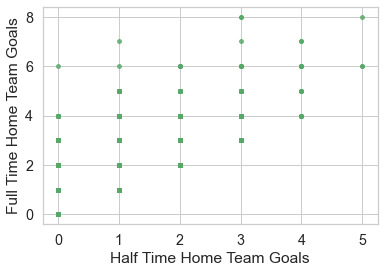

In [77]:
# 산점도 출력 : 하프타임- 풀타임
plt.scatter(list_x[:,0],list_y[:,0],c='g',s=15,alpha=0.8) # 실수값
plt.xlabel('Half Time Home Team Goals')
plt.ylabel('Full Time Home Team Goals')
plt.show()

In [78]:
# 데이터를 Training과 Testing 용으로 쪼갠다.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1234)

In [79]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1940, 7)
(1294, 7)
(1940, 1)
(1294, 1)


In [80]:
# 학습과 예측.
LR = LogisticRegression(solver='liblinear',max_iter=200)
LR.fit(X_train,Y_train)
Y_pred_test = LR.predict(X_test)                            # Out-of-sample prediction. 

In [81]:
# 혼동 행렬.
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test)
print(conf_mat)

[[218  86   5   1   0   0   0   0   0]
 [143 208  58   4   0   0   0   0   0]
 [ 28 121 149   7   0   0   0   0   0]
 [  7  37 106  18   0   0   0   0   0]
 [  1   8  38  19   0   0   0   0   0]
 [  0   1  15   7   0   0   0   0   0]
 [  0   0   1   6   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0]]


In [84]:
# 혼동행렬을 사용한 Accuracy, Sensitivity, Specificity, Precision 계산.
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
precision = conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1])
print('정확도   = {}'.format(np.round(accuracy,3)))
print('민감도   = {}'.format(np.round(sensitivity,3)))
print('특이도   = {}'.format(np.round(specificity,3)))
print('정밀도   = {}'.format(np.round(precision,3)))

정확도   = 0.329
민감도   = 0.593
특이도   = 0.717
정밀도   = 0.707
